# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates  
- male and female life expectancy  
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.
- Use **PCA** to reduce the dimensionality of the data and support your interpretation.
- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram**, and analyze the outcome.
- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.
- Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?


In [1]:
import pandas as pd

df = pd.read_csv("europe_demo_cleaned.csv")

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop non-numeric features
df_drop = df.drop(columns=["country_name"])

# Design and implement a machine learning pipeline
scaler = StandardScaler()
pca = PCA()

# Create pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to the data
pipeline.fit(df_drop)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [24]:
# Use PCA
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

pca.fit(df_drop)

# Transform df: pca_features
pca_features = pca.transform(df_drop)

# Check if PCA works
print(df_drop.shape)
print(pca_features.shape)

(36, 6)
(36, 2)


In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Apply hierarchial clustering
# Extract the scaled data (before PCA) from the pipeline
scaled_df = pipeline.named_steps["standardscaler"].transform(df_drop)

# Create linkage matrix (e.g. using 'ward' method)
linked = linkage(scaled_df, method="ward")

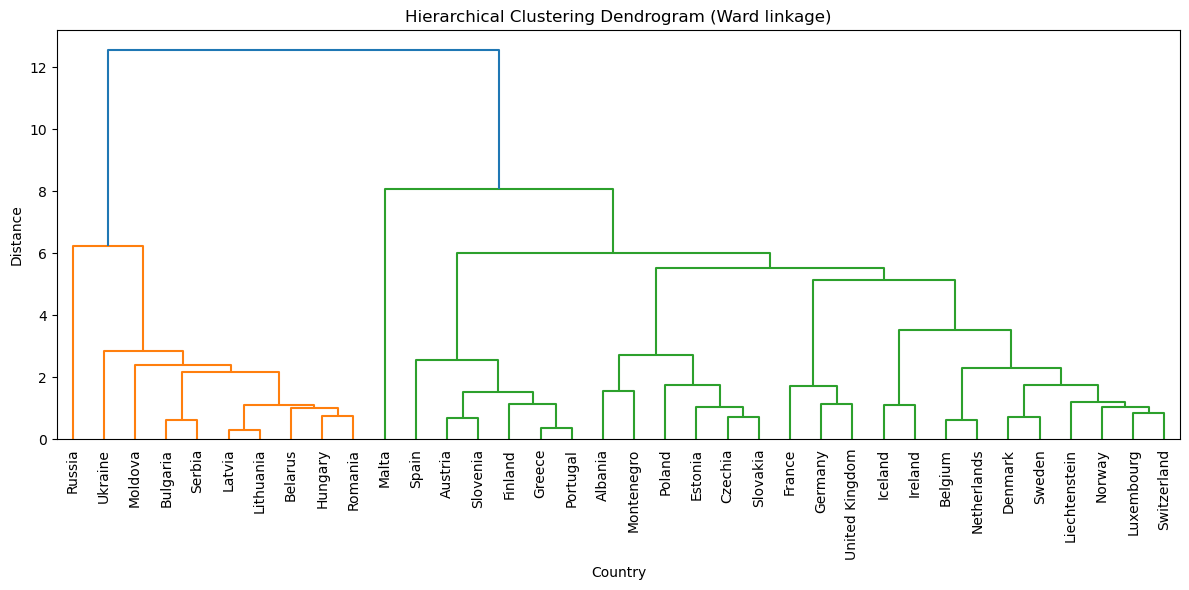

In [27]:
# Visualize the result
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df["country_name"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [37]:
# Analyze the outcome
# Assign cluster labels (e.g. 4 clusters)
n_clusters = 4
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# Add cluster labels to the original dataframe
df["Cluster"] = cluster_labels

# Analyze cluster characteristics
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print("Cluster Summary:\n", cluster_summary)

# Display all countries with their cluster labels
df[["country_name", "Cluster"]].sort_values(by="Cluster")

Cluster Summary:
          birth_rate  death_rate  male_life_expectancy  female_life_expectancy  \
Cluster                                                                         
1          9.033333   15.144444             69.833333               78.244444   
2          9.800000   14.600000             66.500000               76.400000   
3          9.864000   10.000000             78.328000               83.252000   
4          8.600000    7.900000             80.800000               84.600000   

          population  population_per_sq_km  
Cluster                                     
1         11519000.0             66.014444  
2        144104000.0              8.428000  
3         17068693.0            136.747120  
4           515332.0           1610.000000  


,country_name,Cluster
12,Moldova,1
11,Hungary,1
9,Bulgaria,1
14,Romania,1
8,Belarus,1
24,Lithuania,1
23,Latvia,1
17,Ukraine,1
33,Serbia,1
15,Russia,2


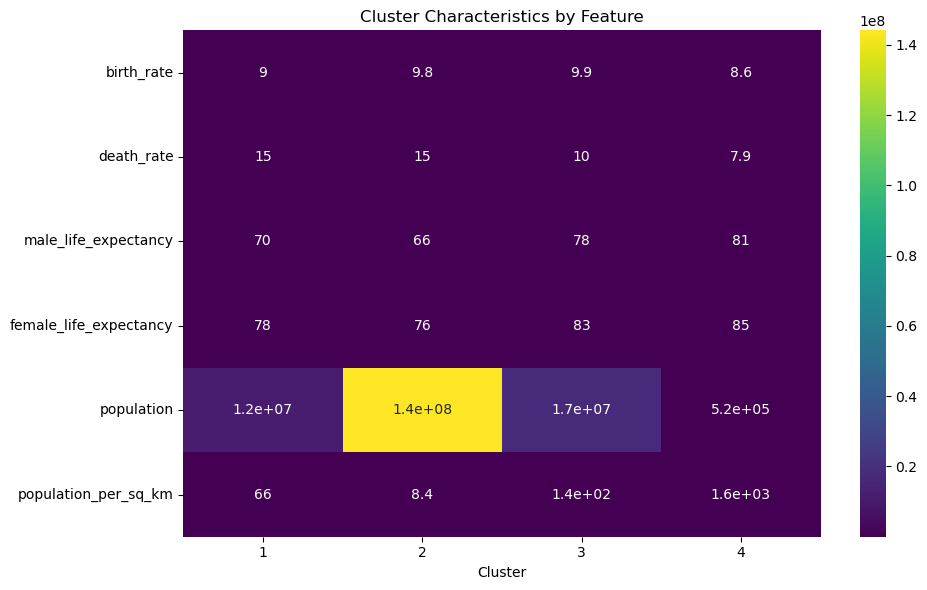

In [38]:
# Analyze the outcome
# Visualize cluster characteristics as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, annot=True, cmap="viridis")
plt.title("Cluster Characteristics by Feature")
plt.tight_layout()
plt.show()

Interpretation:

Cluster 1: Moderate birth rate, **high death rate**, **low life expectancy**

Cluster 2: Only Russia — **very large population**, **low life expectancy**

Cluster 3: Most of Western/Northern Europe — **high life expectancy**, **balanced demographics**

Cluster 4: Only Malta — **very high population density**, small size

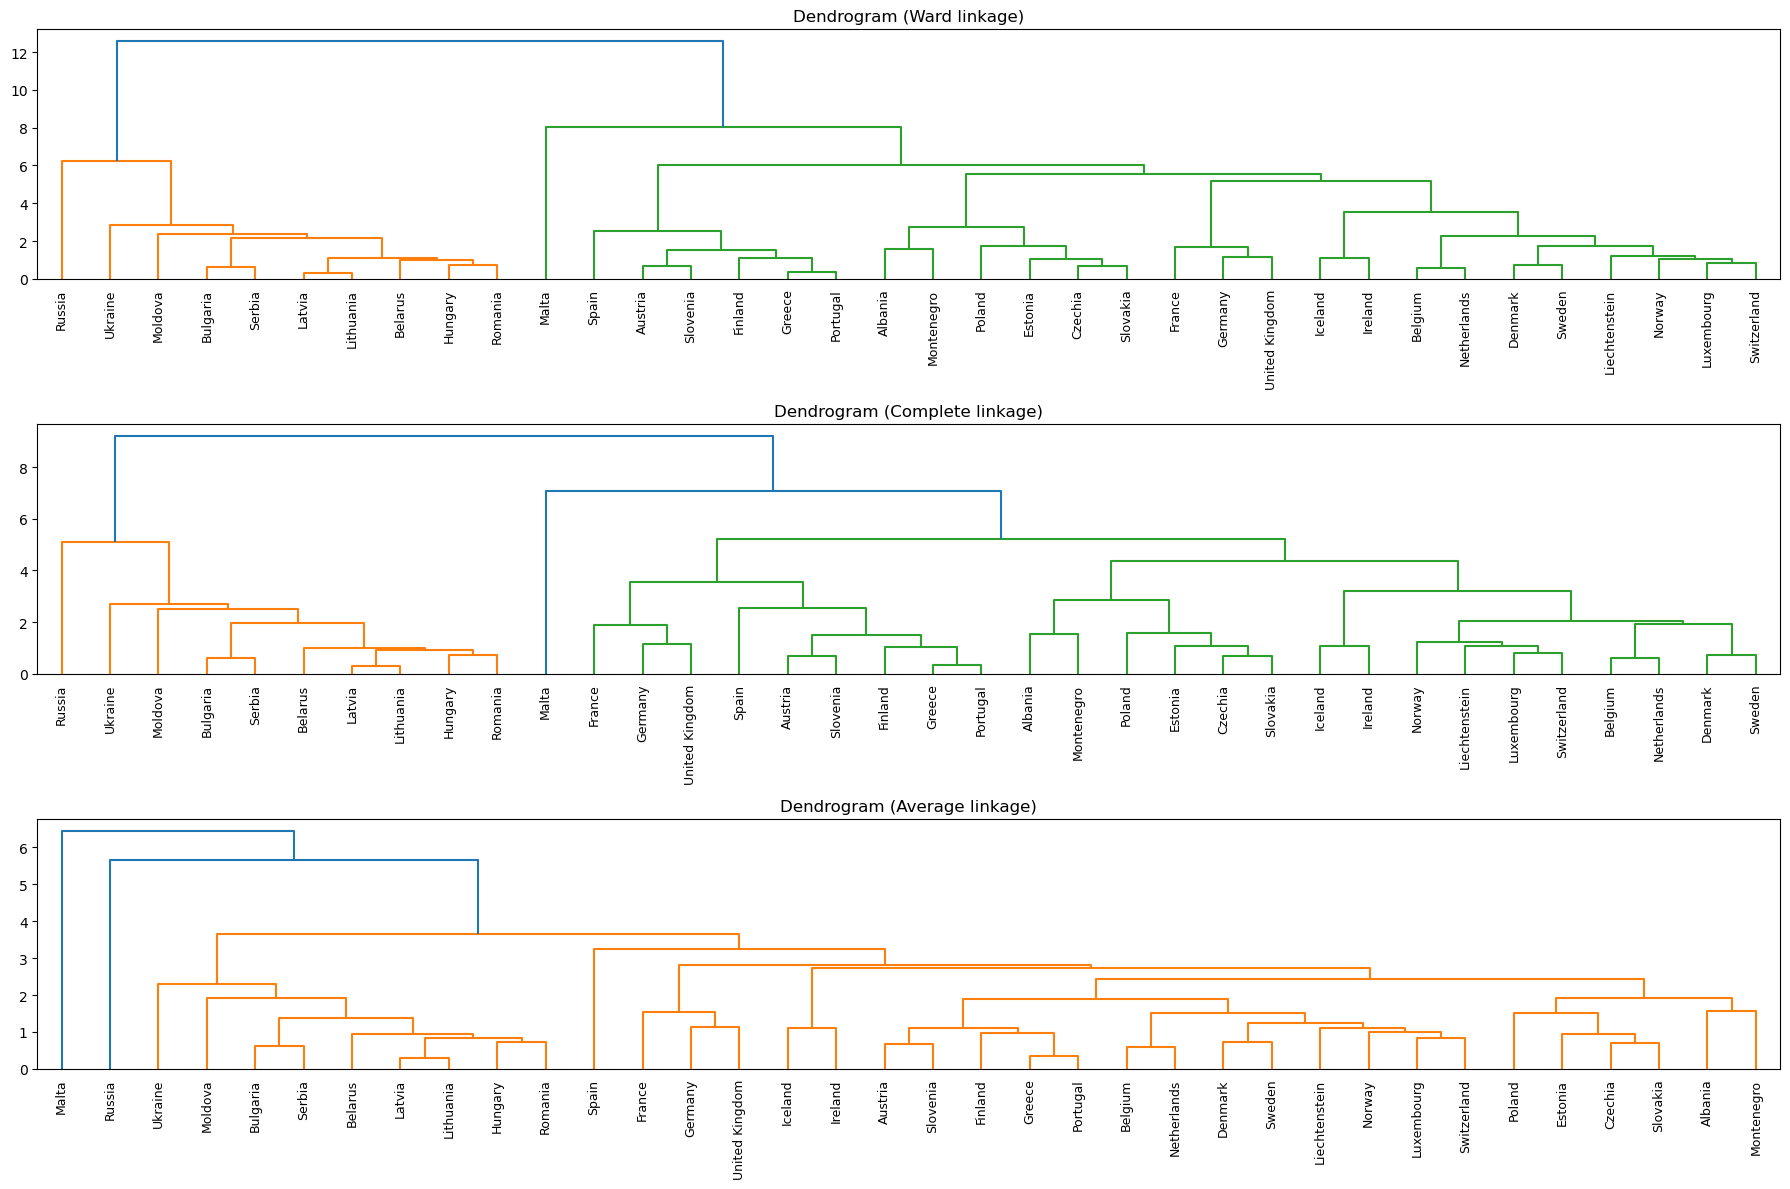

In [40]:
# Investigate and compare different linkage methods
# Use the same scaled data
methods = ["ward", "complete", "average"]

# Plot dendrograms for each method
plt.figure(figsize=(18, 12))
for i, method in enumerate(methods, 1):
    plt.subplot(3, 1, i)
    linked = linkage(scaled_df, method=method)
    dendrogram(linked, labels=df["country_name"].values, leaf_rotation=90, leaf_font_size=9)
    plt.title(f"Dendrogram ({method.capitalize()} linkage)")
plt.tight_layout()
plt.show()

Interpretation:

**Ward linkage** produced the cleanest dendrogram with balanced clusters, and visually separated countries that share similar demographics (e.g. Eastern vs Western Europe).

**Complete linkage** created tighter, smaller clusters, but sometimes over-fragmented similar countries.

**Average linkage** gave smoother but less distinct separation.

Therefore, we chose **Ward linkage** for its clear cluster structure and interpretability in demographic grouping.

In [ ]:
# Characterize each resulting cluster

Based on what we have already done above, we can get the following conclusions:
1. Cluster 1
- Countries

Belarus, Bulgaria, Hungary, Moldova, Romania, Ukraine, Latvia, Lithuania, Serbia

- Common traits

**Lower life expectancy** (69.8 male, 78.2 female)

**High death rate** (15.1 per 1000)

**Lower population density** (~66 people/km²)

- Interpretation

This cluster represents mostly Eastern European countries with aging populations, higher mortality, and lower life expectancy — a demographic profile typical of post-Soviet or transitioning health systems.

2. Cluster 2
- Countries

Russia

- Common traits

**Lowest life expectancy** of all clusters (66.5 male, 76.4 female)

**Very large population** (~144 million)

**Extremely low population density** (~8 people/km²)

- Interpretation

Russia forms its own cluster due to being a demographic outlier — a mix of very low life expectancy, massive population, and geographical vastness.

3. Cluster 3
- Countries

Austria, Belgium, France, Germany, Liechtenstein, Luxembourg, Netherlands, Switzerland, Czechia, Poland, Slovakia, Denmark, Estonia, Finland, Iceland, Ireland, Norway, Sweden, United Kingdom, Albania, Greece, Montenegro, Portugal, Slovenia, Spain

- Common traits

**High life expectancy** (78.3 male, 83.3 female)

**Moderate birth and death rates**

**Medium population density** (~137 people/km²)

- Interpretation

This is the largest and most "standard" cluster — Western and Northern European countries with strong healthcare, stable demographics, and balanced population metrics.

4. Cluster 4
- Countries

Malta

- Common Traits

**Very high life expectancy** (80.8 male, 84.6 female)

**Low birth and death rates**

**Extremely high population density** (~1610 people/km²)

- Interpretation

Malta stands alone as a unique outlier — a very small country with exceptional health outcomes and extreme urban density, unlike any other in the dataset.